# Hierarchical Clustering
Phân cụm phân cấp trên dữ liệu PCA30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install scikit-learn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Project_ML/"

df_pca = pd.read_csv(DATA_PATH + 'data_pca30.csv', index_col=0)
X_pca30 = df_pca.values

print(f"Data shape: {X_pca30.shape}")

Data shape: (801, 30)


## Dendrogram

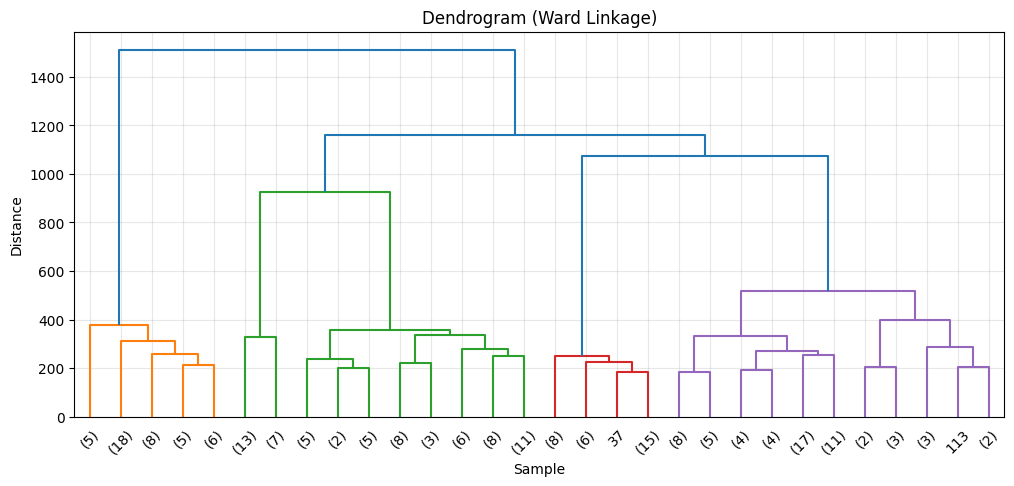

In [ ]:
np.random.seed(2025)
sample_idx = np.random.choice(X_pca30.shape[0], size=200, replace=False)
X_sample = X_pca30[sample_idx]

Z = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.grid(True, alpha=0.3)
plt.show()

## Tìm số cụm tối ưu - Silhouette Score

In [ ]:
silhouette_scores = []
n_clusters_range = range(2, 11)

for n in n_clusters_range:
    hc = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = hc.fit_predict(X_pca30)
    score = silhouette_score(X_pca30, labels)
    silhouette_scores.append(score)
    print(f"n={n}: Silhouette={score:.4f}")

best_n = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nOptimal n_clusters: {best_n}")

n=2: Silhouette=0.2707
n=3: Silhouette=0.2839
n=4: Silhouette=0.3321
n=5: Silhouette=0.3699
n=6: Silhouette=0.3703
n=7: Silhouette=0.3122
n=8: Silhouette=0.3128
n=9: Silhouette=0.2584
n=10: Silhouette=0.2338

Optimal n_clusters: 6


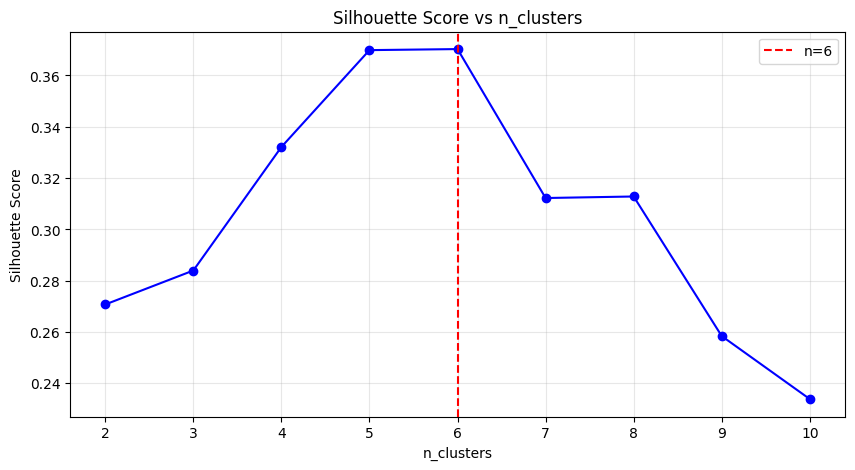

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, silhouette_scores, 'bo-')
plt.axvline(x=best_n, color='red', linestyle='--', label=f'n={best_n}')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs n_clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Train Hierarchical Clustering với n tối ưu

In [ ]:
hc = AgglomerativeClustering(n_clusters=best_n, linkage='ward')
labels_hc = hc.fit_predict(X_pca30)
sil_hc = silhouette_score(X_pca30, labels_hc)

print(f"Hierarchical Clustering Results:")
print(f"  n_clusters = {best_n}")
print(f"  linkage = ward")
print(f"  Silhouette Score = {sil_hc:.4f}")

unique, counts = np.unique(labels_hc, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")

Hierarchical Clustering Results:
  n_clusters = 6
  linkage = ward
  Silhouette Score = 0.3703
  Cluster 0: 254 samples
  Cluster 1: 146 samples
  Cluster 2: 136 samples
  Cluster 3: 140 samples
  Cluster 4: 77 samples
  Cluster 5: 48 samples


## Lưu kết quả

In [ ]:
df_labels = pd.DataFrame(labels_hc, index=df_pca.index, columns=['hierarchical'])
df_labels.to_csv(DATA_PATH + 'hierarchical_labels.csv')
print("Saved: hierarchical_labels.csv")

Saved: hierarchical_labels.csv


## Visualization

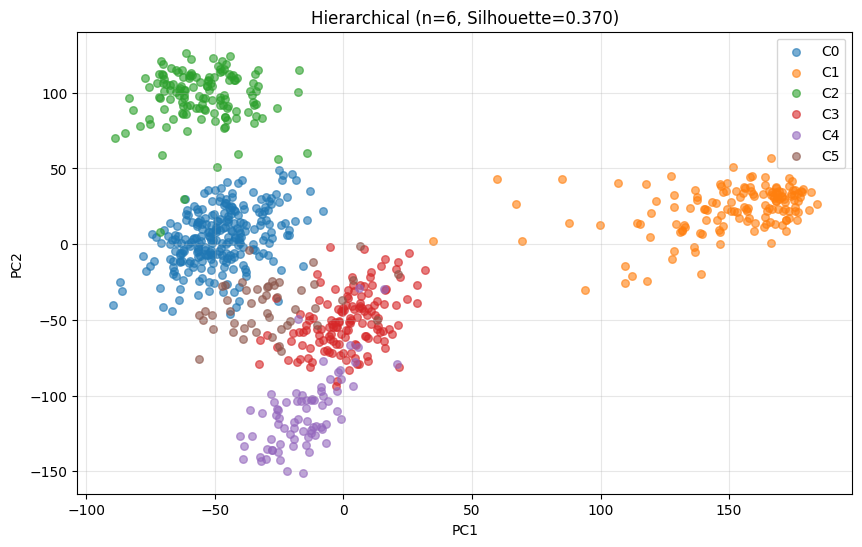

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(best_n):
    plt.scatter(X_pca30[labels_hc==i, 0], X_pca30[labels_hc==i, 1],
                label=f'C{i}', alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Hierarchical (n={best_n}, Silhouette={sil_hc:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()